# Multi-layer Perceptron

In [6]:
# remove warnings 
import warnings 
warnings.filterwarnings("ignore")

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])

Epoch 1/100
7/7 [==============================] - 2s 2ms/step - loss: 10.9347 - mae: 2.9922
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 8.8834 - mae: 2.6331
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 7.0601 - mae: 2.2682
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 5.4283 - mae: 1.9085
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 4.0747 - mae: 1.5860
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 2.9875 - mae: 1.3239
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 2.1868 - mae: 1.1400
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 1.7355 - mae: 1.0380
Epoch 9/100
7/7 [==============================] - 0s 13ms/step - loss: 1.4612 - mae: 0.9657
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 1.3159 - mae: 0.9135
Epoch 11/100
7/7 [==============================] - 0s 5ms/step - loss: 1.251

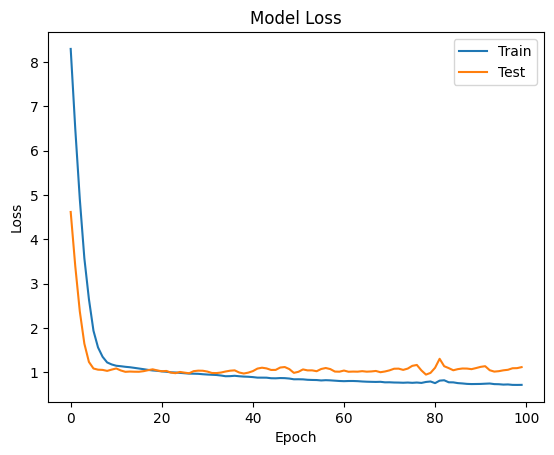

In [9]:
# remove warnings 
import warnings 
warnings.filterwarnings("ignore")

# Building the model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1) # Output layer for regression
])

# Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and plot the training and testing loss and accuracy at each epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Early Stopping of Epochs

Epoch 1/100
7/7 [==============================] - 4s 102ms/step - loss: 10.6567 - val_loss: 6.3176
Epoch 2/100
7/7 [==============================] - 0s 18ms/step - loss: 8.6459 - val_loss: 4.8785
Epoch 3/100
7/7 [==============================] - 0s 36ms/step - loss: 6.8983 - val_loss: 3.6462
Epoch 4/100
7/7 [==============================] - 0s 22ms/step - loss: 5.3493 - val_loss: 2.6769
Epoch 5/100
7/7 [==============================] - 0s 20ms/step - loss: 4.0737 - val_loss: 1.9871
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 3.0781 - val_loss: 1.6164
Epoch 7/100
7/7 [==============================] - 0s 17ms/step - loss: 2.3781 - val_loss: 1.4915
Epoch 8/100
7/7 [==============================] - 0s 13ms/step - loss: 1.9397 - val_loss: 1.5207
Epoch 9/100
7/7 [==============================] - 0s 19ms/step - loss: 1.7713 - val_loss: 1.5632
Epoch 10/100
7/7 [==============================] - 0s 13ms/step - loss: 1.5716 - val_loss: 1.4909
Epoch 11/100
7/7 

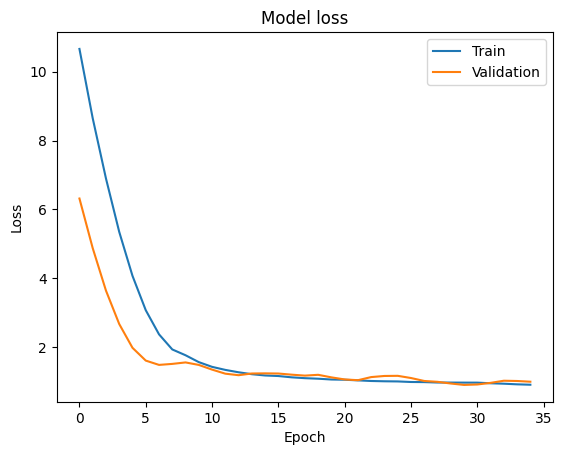

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()